In [1]:
import numpy as np
import itertools 
from ezc3d import c3d
import matplotlib.pyplot as plt
import pyomeca
#import dtw
from pathlib import Path
from math import sqrt
from pyomeca import Markers, Analogs
from tqdm import tqdm

#DATA_FOLDER = Path(r"C:\Users\GMultimedia\Desktop\Praktyki_2020") 
#MARKERS1_C3D = DATA_FOLDER / "2020-08-05-B0444-S01-E01-T01.c3d"

#Markers.from_c3d(MARKERS1_C3D)


#c = c3d(r"C:\Users\GMultimedia\Desktop\Praktyki_2020\2020-08-05-B0444-S01-E01-T01.c3d")
#print(c['parameters']['POINT']['USED']['value'][0]);  # Print the number of points used
#point_data = c['data']['points']
#points_residuals = c['data']['meta_points']['residuals']
#analog_data = c['data']['analogs']

#point_data.shape

#data_path = (r"C:\Users\GMultimedia\Desktop\Praktyki_2020\2020-08-05-B0444-S01-E01-T01.c3d")
#markers = ["B0444:LFHD"]
#wykres = Markers.from_c3d(data_path, usecols=markers)
#wykres.plot()

In [2]:
from pyomeca import Markers

data_path = r"C:\Users\GMultimedia\Desktop\Praktyki_2020\2020-08-05-B0444-S01-E01-T01.c3d"
markers = Markers.from_c3d(data_path, prefix_delimiter=":")


In [3]:
markers

<xarray.DataArray 'markers' (axis: 4, channel: 222, time: 8699)>
array([[[-4.70854279e+02, -4.70782227e+02, -4.70710724e+02, ...,
         -2.93886139e+02, -2.93809021e+02, -2.93730591e+02],
        [-3.33613129e+02, -3.33547028e+02, -3.33481506e+02, ...,
         -1.73383804e+02, -1.73328842e+02, -1.73273239e+02],
        [-5.06910980e+02, -5.06850800e+02, -5.06790527e+02, ...,
         -3.78544037e+02, -3.78490967e+02, -3.78437653e+02],
        ...,
        [ 3.61718353e+02,  3.61748596e+02,  3.61780426e+02, ...,
          4.50192566e+02,  4.50223602e+02,  4.50250580e+02],
        [-3.99761261e+02, -3.99741333e+02, -3.99720184e+02, ...,
         -3.09585205e+02, -3.09524078e+02, -3.09462921e+02],
        [-3.99761261e+02, -3.99741333e+02, -3.99720184e+02, ...,
         -3.09585205e+02, -3.09524078e+02, -3.09462921e+02]],

       [[-3.17357605e+02, -3.17354065e+02, -3.17350616e+02, ...,
         -3.42812561e+02, -3.42839417e+02, -3.42867981e+02],
        [-3.34015564e+02, -3.34020233e+02, -3.34024231e+02, ...,
         -4.10231903e+02, -4.10272217e+02, -4.10313660e+02],
        [-4.16579895e+02, -4.16582184e+02, -4.16584991e+02, ...,
         -4.19674896e+02, -4.19678528e+02, -4.19683014e+02],
...
        [ 1.45081165e+03,  1.45084180e+03,  1.45086853e+03, ...,
          1.53264160e+03,  1.53273511e+03,  1.53282935e+03],
        [ 1.09487183e+03,  1.09487354e+03,  1.09487500e+03, ...,
          1.09493506e+03,  1.09494067e+03,  1.09494617e+03],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
        [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
        [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
        ...,
        [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
        [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
        [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00]]])
Coordinates:
  * axis     (axis) <U4 'x' 'y' 'z' 'ones'
  * channel  (channel) <U21 'LFHD' 'RFHD' ... 'CentreOfMass' 'CentreOfMassFloor'
  * time     (time) float64 0.0 0.005 0.01 0.015 ... 43.48 43.48 43.48 43.49
Attributes:
    first_frame:  0
    last_frame:   8698
    rate:         200.0
    units:        mm

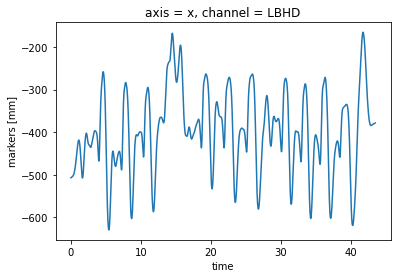

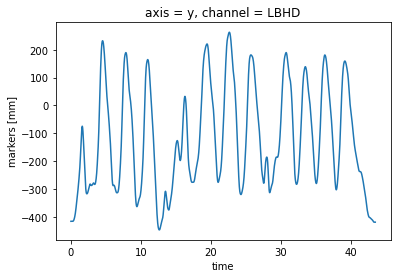

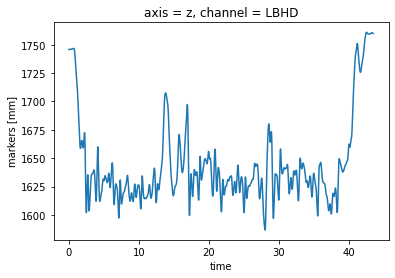

In [4]:
markers.sel(axis="x", channel="LBHD").plot.line(x="time");
plt.show()
markers.sel(axis="y", channel="LBHD").plot.line(x="time");
plt.show()
markers.sel(axis="z", channel="LBHD").plot.line(x="time");
plt.show()


In [5]:
markers.attrs


{'first_frame': 0, 'last_frame': 8698, 'rate': 200.0, 'units': 'mm'}

In [6]:
 
from ezc3d import c3d


 
data_path = r"C:\Users\GMultimedia\Desktop\Praktyki_2020\2020-08-05-B0444-S01-E01-T01.c3d"


 
file = c3d(data_path)


 
print("Ilość ramek to:", file['parameters']['POINT']['FRAMES']['value'][0])

Ilość ramek to: 8699


In [7]:
file['parameters']

In [8]:
# Print the header

c3d_to_compare= c3d(data_path)
print("# ---- HEADER ---- #")

print(f"Number of points = {c3d_to_compare['header']['points']['size']}")

print(f"Point frame rate = {c3d_to_compare['header']['points']['frame_rate']}")

print(f"Index of the first point frame = {c3d_to_compare['header']['points']['first_frame']}")

print(f"Index of the last point frame = {c3d_to_compare['header']['points']['last_frame']}")

print("")

print(f"Number of analogs = {c3d_to_compare['header']['analogs']['size']}")

print(f"Analog frame rate = {c3d_to_compare['header']['analogs']['frame_rate']}")

print(f"Index of the first analog frame = {c3d_to_compare['header']['analogs']['first_frame']}")

print(f"Index of the last analog frame = {c3d_to_compare['header']['analogs']['last_frame']}")

print("")

print("")

# Print the parameters

print("# ---- PARAMETERS ---- #")

print(f"Number of points = {c3d_to_compare['parameters']['POINT']['USED']['value'][0]}")

print(f"Name of the points = {c3d_to_compare['parameters']['POINT']['LABELS']['value']}")

print(f"Point frame rate = {c3d_to_compare['parameters']['POINT']['RATE']['value'][0]}")

print(f"Number of frames = {c3d_to_compare['parameters']['POINT']['FRAMES']['value'][0]}")

# print(f"My point new Param = {c3d_to_compare['parameters']['POINT']['NewParam']['value']}")



# ---- HEADER ---- #
Number of points = 222
Point frame rate = 200.0
Index of the first point frame = 0
Index of the last point frame = 8698

Number of analogs = 28
Analog frame rate = 1000.0
Index of the first analog frame = 0
Index of the last analog frame = 43494


# ---- PARAMETERS ---- #
Number of points = 222
Name of the points = ['B0444:LFHD', 'B0444:RFHD', 'B0444:LBHD', 'B0444:RBHD', 'B0444:C7', 'B0444:T10', 'B0444:CLAV', 'B0444:STRN', 'B0444:RBAK', 'B0444:LSHO', 'B0444:LUPA', 'B0444:LELB', 'B0444:LFRM', 'B0444:LWRA', 'B0444:LWRB', 'B0444:LFIN', 'B0444:RSHO', 'B0444:RUPA', 'B0444:RELB', 'B0444:RFRM', 'B0444:RWRA', 'B0444:RWRB', 'B0444:RFIN', 'B0444:LASI', 'B0444:RASI', 'B0444:LPSI', 'B0444:RPSI', 'B0444:LTHI', 'B0444:LKNE', 'B0444:LTIB', 'B0444:LANK', 'B0444:LHEE', 'B0444:LTOE', 'B0444:RTHI', 'B0444:RKNE', 'B0444:RTIB', 'B0444:RANK', 'B0444:RHEE', 'B0444:RTOE', 'B0444:PELO', 'B0444:PELA', 'B0444:PELL', 'B0444:PELP', 'B0444:LFEO', 'B0444:LFEA', 'B0444:LFEL', 'B0444:LFEP', 'B0444

In [9]:
print("")

print(f"Number of analogs = {c3d_to_compare['parameters']['ANALOG']['USED']['value'][0]}")

print(f"Name of the analogs = {c3d_to_compare['parameters']['ANALOG']['LABELS']['value']}")

print(f"Analog frame rate = {c3d_to_compare['parameters']['ANALOG']['RATE']['value'][0]}")

print("")

#print(f"My NewGroup new Param = {c3d_to_compare['parameters']['NewGroup']['NewParam']['value']}")

print("")

print("")

# Print the data

print("# ---- DATA ---- #")

print(f" = {c3d_to_compare['data']['points'][0:2, :, :]}")

#print(f" = {c3d_to_compare['data']['analogs']}")


Number of analogs = 28
Name of the analogs = ['Force.Fx1', 'Force.Fy1', 'Force.Fz1', 'Moment.Mx1', 'Moment.My1', 'Moment.Mz1', 'Force.Fx2', 'Force.Fy2', 'Force.Fz2', 'Moment.Mx2', 'Moment.My2', 'Moment.Mz2', 'Voltage.1', 'Voltage.2', 'Voltage.3', 'Voltage.4', 'Voltage.5', 'Voltage.6', 'Voltage.7', 'Voltage.8', 'Voltage.9', 'Voltage.10', 'Voltage.11', 'Voltage.12', 'Voltage.13', 'Voltage.14', 'Voltage.15', 'Voltage.16']
Analog frame rate = 1000.0



# ---- DATA ---- #
 = [[[-470.85427856 -470.78222656 -470.71072388 ... -293.88613892
   -293.809021   -293.73059082]
  [-333.61312866 -333.54702759 -333.48150635 ... -173.38380432
   -173.32884216 -173.27323914]
  [-506.91098022 -506.85079956 -506.79052734 ... -378.54403687
   -378.4909668  -378.43765259]
  ...
  [ 361.71835327  361.74859619  361.78042603 ...  450.19256592
    450.22360229  450.25057983]
  [-399.76126099 -399.74133301 -399.72018433 ... -309.58520508
   -309.52407837 -309.46292114]
  [-399.76126099 -399.74133301 -399.7201843

In [10]:
c3d_to_compare['parameters']['EVENT']

{'__METADATA__': {'DESCRIPTION': '', 'IS_LOCKED': False},
 'USED': {'type': 2,
  'description': '',
  'is_locked': False,
  'value': array([21])},
 'CONTEXTS': {'type': -1,
  'description': '',
  'is_locked': False,
  'value': ['General',
   'General',
   'General',
   'General',
   'General',
   'General',
   'General',
   'General',
   'General',
   'General',
   'General',
   'General',
   'General',
   'General',
   'General',
   'General',
   'General',
   'General',
   'General',
   'General',
   'General']},
 'ICON_IDS': {'type': 2,
  'description': '',
  'is_locked': False,
  'value': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])},
 'LABELS': {'type': -1,
  'description': '',
  'is_locked': False,
  'value': ['Event',
   'Event',
   'Event',
   'Event',
   'Event',
   'Event',
   'Event',
   'Event',
   'Event',
   'Event',
   'Event',
   'Event',
   'Foot Strike',
   'Foot Strike',
   'Foot Strike',
   'Foot Strike',
   'Foot Strike',
   'Foot Strike',

In [11]:
c3d_to_compare['parameters']['EVENT']['CONTEXTS']['value']

['General',
 'General',
 'General',
 'General',
 'General',
 'General',
 'General',
 'General',
 'General',
 'General',
 'General',
 'General',
 'General',
 'General',
 'General',
 'General',
 'General',
 'General',
 'General',
 'General',
 'General']

In [12]:
c3d_to_compare['parameters']['EVENT']['LABELS']['value']

['Event',
 'Event',
 'Event',
 'Event',
 'Event',
 'Event',
 'Event',
 'Event',
 'Event',
 'Event',
 'Event',
 'Event',
 'Foot Strike',
 'Foot Strike',
 'Foot Strike',
 'Foot Strike',
 'Foot Strike',
 'Foot Strike',
 'Foot Strike',
 'Foot Strike',
 'Foot Strike']

In [13]:
c3d_to_compare['parameters']['EVENT']['TIMES']['value'][1]

array([ 3.31999993,  6.5999999 ,  9.80000019, 12.53999996, 17.39999962,
       21.34499931, 24.875     , 27.45000076, 29.81999969, 32.31000137,
       35.38499832, 38.04499817,  4.60500002,  7.76499987, 11.08500004,
       19.22500038, 22.71500015, 26.24500084, 30.86000061, 33.34999847,
       36.25500107])

In [14]:
markers

<xarray.DataArray 'markers' (axis: 4, channel: 222, time: 8699)>
array([[[-4.70854279e+02, -4.70782227e+02, -4.70710724e+02, ...,
         -2.93886139e+02, -2.93809021e+02, -2.93730591e+02],
        [-3.33613129e+02, -3.33547028e+02, -3.33481506e+02, ...,
         -1.73383804e+02, -1.73328842e+02, -1.73273239e+02],
        [-5.06910980e+02, -5.06850800e+02, -5.06790527e+02, ...,
         -3.78544037e+02, -3.78490967e+02, -3.78437653e+02],
        ...,
        [ 3.61718353e+02,  3.61748596e+02,  3.61780426e+02, ...,
          4.50192566e+02,  4.50223602e+02,  4.50250580e+02],
        [-3.99761261e+02, -3.99741333e+02, -3.99720184e+02, ...,
         -3.09585205e+02, -3.09524078e+02, -3.09462921e+02],
        [-3.99761261e+02, -3.99741333e+02, -3.99720184e+02, ...,
         -3.09585205e+02, -3.09524078e+02, -3.09462921e+02]],

       [[-3.17357605e+02, -3.17354065e+02, -3.17350616e+02, ...,
         -3.42812561e+02, -3.42839417e+02, -3.42867981e+02],
        [-3.34015564e+02, -3.34020233e+02, -3.34024231e+02, ...,
         -4.10231903e+02, -4.10272217e+02, -4.10313660e+02],
        [-4.16579895e+02, -4.16582184e+02, -4.16584991e+02, ...,
         -4.19674896e+02, -4.19678528e+02, -4.19683014e+02],
...
        [ 1.45081165e+03,  1.45084180e+03,  1.45086853e+03, ...,
          1.53264160e+03,  1.53273511e+03,  1.53282935e+03],
        [ 1.09487183e+03,  1.09487354e+03,  1.09487500e+03, ...,
          1.09493506e+03,  1.09494067e+03,  1.09494617e+03],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
        [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
        [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
        ...,
        [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
        [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
        [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00]]])
Coordinates:
  * axis     (axis) <U4 'x' 'y' 'z' 'ones'
  * channel  (channel) <U21 'LFHD' 'RFHD' ... 'CentreOfMass' 'CentreOfMassFloor'
  * time     (time) float64 0.0 0.005 0.01 0.015 ... 43.48 43.48 43.48 43.49
Attributes:
    first_frame:  0
    last_frame:   8698
    rate:         200.0
    units:        mm

In [15]:
def read_labels(data_path):
    c3d_to_compare= c3d(data_path)
    event = c3d_to_compare['parameters']['EVENT']['LABELS']['value']
    time = c3d_to_compare['parameters']['EVENT']['TIMES']['value'][1]
    
    return [event, time]

In [16]:
read_labels(data_path)

[['Event',
  'Event',
  'Event',
  'Event',
  'Event',
  'Event',
  'Event',
  'Event',
  'Event',
  'Event',
  'Event',
  'Event',
  'Foot Strike',
  'Foot Strike',
  'Foot Strike',
  'Foot Strike',
  'Foot Strike',
  'Foot Strike',
  'Foot Strike',
  'Foot Strike',
  'Foot Strike'],
 array([ 3.31999993,  6.5999999 ,  9.80000019, 12.53999996, 17.39999962,
        21.34499931, 24.875     , 27.45000076, 29.81999969, 32.31000137,
        35.38499832, 38.04499817,  4.60500002,  7.76499987, 11.08500004,
        19.22500038, 22.71500015, 26.24500084, 30.86000061, 33.34999847,
        36.25500107])]

In [17]:
3.31999993 * 200

663.9999859999999

In [18]:
import data_procesing as dp
import numpy as np
import importlib

In [19]:
importlib.reload(dp)
data_path = r"C:\Users\GMultimedia\Desktop\Praktyki_2020\2020-08-05-B0444-S01-E01-T01.c3d"
eventy = dp.read_labels(data_path)
print(eventy[1])

print(eventy[0][15])
print(eventy[0][:])
eventy[0].index('Foot Strike')


indxE = [i for i, x in enumerate(eventy[0]) if x == "Event"]
print(indxE)
indxFS = [i for i, x in enumerate(eventy[0]) if x == "Foot Strike"]
print(indxFS)

CzasFS = np.zeros(len(indxFS))
for i in range(len(indxFS)):
    print(indxFS[i])
    CzasFS[i] = eventy[1][indxFS[i]]
print('Czasy Foot Strikeów',CzasFS)

CzasE = np.zeros(len(indxE))
for i in range(len(indxE)):
    print(indxE[i])
    CzasE[i] = eventy[1][indxE[i]]
print('Czasy Eventów:',CzasE)
print(eventy[1])
eventy[1].sort()
print(eventy[1])


[ 664. 1320. 1960. 2508. 3480. 4269. 4975. 5490. 5964. 6462. 7077. 7609.
  921. 1553. 2217. 3845. 4543. 5249. 6172. 6670. 7251.]
Foot Strike
['Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Foot Strike', 'Foot Strike', 'Foot Strike', 'Foot Strike', 'Foot Strike', 'Foot Strike', 'Foot Strike', 'Foot Strike', 'Foot Strike']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[12, 13, 14, 15, 16, 17, 18, 19, 20]
12
13
14
15
16
17
18
19
20
Czasy Foot Strikeów [ 921. 1553. 2217. 3845. 4543. 5249. 6172. 6670. 7251.]
0
1
2
3
4
5
6
7
8
9
10
11
Czasy Eventów: [ 664. 1320. 1960. 2508. 3480. 4269. 4975. 5490. 5964. 6462. 7077. 7609.]
[ 664. 1320. 1960. 2508. 3480. 4269. 4975. 5490. 5964. 6462. 7077. 7609.
  921. 1553. 2217. 3845. 4543. 5249. 6172. 6670. 7251.]
[ 664.  921. 1320. 1553. 1960. 2217. 2508. 3480. 3845. 4269. 4543. 4975.
 5249. 5490. 5964. 6172. 6462. 6670. 7077. 7251. 7609.]


In [20]:
p=np.zeros(20)
d=np.zeros(20)
j=0
for i in range(len(eventy[1])):
    if not i == len(eventy[1])-1:
        pierwszy = eventy[1][i]
        drugi = eventy[1][i+1]
        #print('pierwszy', pierwszy)
        #print('drugi', drugi)
        #print('CZASY E',CzasE)
        if pierwszy in CzasE:
            if drugi in CzasFS:
                
                p[j]=pierwszy
                d[j]=drugi
                print('Początek ruchu', pierwszy, 'Koniec ruchu', drugi)
                j+=1
p=p.astype(int)
d=d.astype(int)

Początek ruchu 664.0 Koniec ruchu 921.0
Początek ruchu 1320.0 Koniec ruchu 1553.0
Początek ruchu 1960.0 Koniec ruchu 2217.0
Początek ruchu 3480.0 Koniec ruchu 3845.0
Początek ruchu 4269.0 Koniec ruchu 4543.0
Początek ruchu 4975.0 Koniec ruchu 5249.0
Początek ruchu 5964.0 Koniec ruchu 6172.0
Początek ruchu 6462.0 Koniec ruchu 6670.0
Początek ruchu 7077.0 Koniec ruchu 7251.0


In [21]:
"""j=0
for i in range(len(eventy[1])):
    if not i >= len(eventy[1])-2:
        pierwszy = eventy[1][i]
        drugi = eventy[1][i+1]
        trzeci = eventy[1][i+2]
        #print('pierwszy', pierwszy)
        #print('drugi', drugi)
        #print('CZASY E',CzasE)
        if pierwszy in CzasE:
            if drugi in CzasFS:
                if trzeci in CzasE:
                    p[j]=pierwszy
                    d[j]=trzeci
                    j+=1
                    print('Początek ruchu', pierwszy, 'Uderzenie', drugi, 'Koniec ruchu', trzeci)
p=p.astype(int)
d=d.astype(int)"""

"j=0\nfor i in range(len(eventy[1])):\n    if not i >= len(eventy[1])-2:\n        pierwszy = eventy[1][i]\n        drugi = eventy[1][i+1]\n        trzeci = eventy[1][i+2]\n        #print('pierwszy', pierwszy)\n        #print('drugi', drugi)\n        #print('CZASY E',CzasE)\n        if pierwszy in CzasE:\n            if drugi in CzasFS:\n                if trzeci in CzasE:\n                    p[j]=pierwszy\n                    d[j]=trzeci\n                    j+=1\n                    print('Początek ruchu', pierwszy, 'Uderzenie', drugi, 'Koniec ruchu', trzeci)\np=p.astype(int)\nd=d.astype(int)"

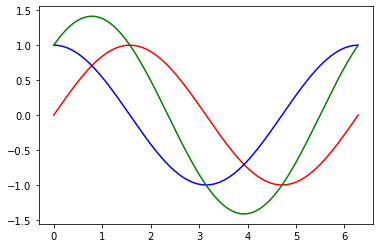

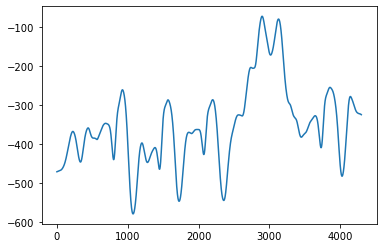

In [22]:
from numpy import *
import math
import matplotlib.pyplot as plt

t = linspace(0, 2*math.pi, 400)
a = sin(t)
b = cos(t)
c = a + b

plt.plot(t, a, 'r') # plotting t, a separately 
plt.plot(t, b, 'b') # plotting t, b separately 
plt.plot(t, c, 'g') # plotting t, c separately 
plt.show()



#plt.plot(markers[i][0],label="base model")
markers.shape
plt.plot(markers[0][0][0:4300])
#plt.xlabel('time [s]')
#plt.ylabel('distance [mm]')
    
#plt.legend(loc="upper right")
#plt.show()

<xarray.DataArray 'markers' (time: 8699)>
array([-470.85427856, -470.78222656, -470.71072388, ..., -293.88613892,
       -293.809021  , -293.73059082])
Coordinates:
    axis     <U4 'x'
    channel  <U21 'LFHD'
  * time     (time) float64 0.0 0.005 0.01 0.015 ... 43.48 43.48 43.48 43.49
Attributes:
    first_frame:  0
    last_frame:   8698
    rate:         200.0
    units:        mm
[ 664 1320 1960 3480 4269 4975 5964 6462 7077    0    0    0    0    0
    0    0    0    0    0    0]


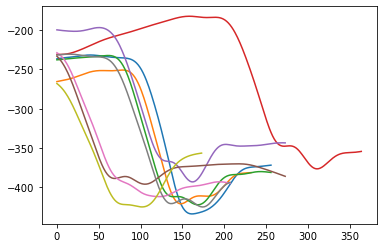

In [23]:
markers.shape
print(markers[0][0][:])
print(p)



for i in range(10):
    plt.plot(markers[0][40][p[i]:d[i]])

<xarray.DataArray 'markers' (time: 8699)>
array([-470.85427856, -470.78222656, -470.71072388, ..., -293.88613892,
       -293.809021  , -293.73059082])
Coordinates:
    axis     <U4 'x'
    channel  <U21 'LFHD'
  * time     (time) float64 0.0 0.005 0.01 0.015 ... 43.48 43.48 43.48 43.49
Attributes:
    first_frame:  0
    last_frame:   8698
    rate:         200.0
    units:        mm
[ 664 1320 1960 3480 4269 4975 5964 6462 7077    0    0    0    0    0
    0    0    0    0    0    0]


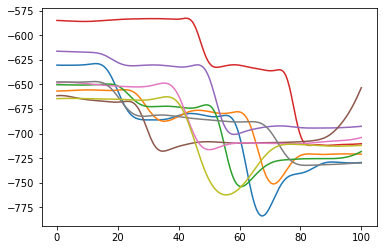

In [24]:
markers.shape
print(markers[0][0][:])
print(p)



#z = x- minx
#   __________
#    maxx - minx
numer_markera=55
for i in range(10):
    #markers[0][numer_markera][p[i]:d[i]]=(markers[0][numer_markera][p[i]:d[i]]-min(markers[0][numer_markera][p[i]:d[i]]))/(max(markers[0][numer_markera][p[i]:d[i]])-min(markers[0][numer_markera][p[i]:d[i]]))
    t_konc=100
    dl_ciagu=d[i]-p[i]
    x=np.linspace(0,t_konc, dl_ciagu)

    plt.plot(x, markers[0][numer_markera][p[i]:d[i]])

<xarray.DataArray 'markers' (time: 8699)>
array([-470.85427856, -470.78222656, -470.71072388, ..., -293.88613892,
       -293.809021  , -293.73059082])
Coordinates:
    axis     <U4 'x'
    channel  <U21 'LFHD'
  * time     (time) float64 0.0 0.005 0.01 0.015 ... 43.48 43.48 43.48 43.49
Attributes:
    first_frame:  0
    last_frame:   8698
    rate:         200.0
    units:        mm
[ 664 1320 1960 3480 4269 4975 5964 6462 7077    0    0    0    0    0
    0    0    0    0    0    0]


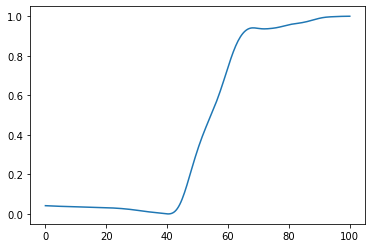

In [40]:
markers.shape
print(markers[0][0][:])
print(p)



#z = x- minx
#   __________
#    maxx - minx
numer_markera=36
for i in range(1):
    markers[0][numer_markera][p[i]:d[i]]=(markers[0][numer_markera][p[i]:d[i]]-min(markers[0][numer_markera][p[i]:d[i]]))/(max(markers[0][numer_markera][p[i]:d[i]])-min(markers[0][numer_markera][p[i]:d[i]]))
    t_konc=100
    dl_ciagu=d[i]-p[i]
    x=np.linspace(0,t_konc, dl_ciagu)
    plt.plot(x, markers[0][numer_markera][p[i]:d[i]])
plt.show()


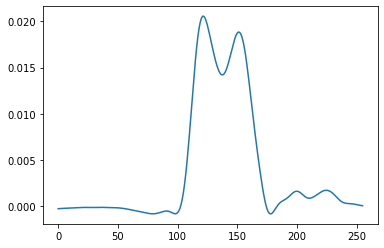

In [45]:

for i in range(1):   
    #[markers[0][i][p[i]:d[i]]-markers[0][i][p[i+1]:d[i+1]]] #for i in range(Len(markers[0][i][p[i]:d[i]])-1)]
    output_diffrence=np.diff(markers[0][36][p[i]:d[i]])
    #print(output_diffrence)
    plt.plot(output_diffrence)

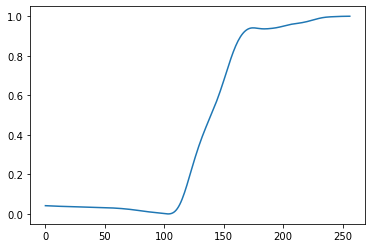

'nr=36\nfor j in range(1):\n    for i in range(len(markers[0][nr][p[j]:d[j]])-1):\n        output_diffrence1=[markers[0][nr][p[i]:d[i]]-markers[0][nr][p[i+1]:d[i+1]]] #for i in range(Len(markers[0][i][p[i]:d[i]])-1)]\n#print(output_diffrence)\n        plt.plot(output_diffrence1)'

In [55]:
for i in range(1):
    plt.plot(markers[0][numer_markera][p[i]:d[i]])
plt.show()
